# New users

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [2]:
# import data
data = pd.read_csv('data1.csv')
# change data type to time stamp in 'event_timestamp'
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[s]')
data.head()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02 11:47:43,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02 11:48:07,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02 11:48:16,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05 16:30:59,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05 16:31:04,All job positions,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday


In [3]:
def new(df, period, agent, start, end):
    # old agents starting point are january agents
    old = set(data[data['month'] == 1][agent])
    res = {}
    for i in range(start, end):
        period_agents = set(df[df[period] == i][agent])
        new_agents = period_agents - old
        old.update(period_agents)
        res[i] = len(new_agents)
        
    new = pd.DataFrame.from_dict(res, orient='index').reset_index()
    new.columns = [period, 'N of new '+str(agent)]
    return new

In [4]:
new_users_month = new(data, 'month', 'user_id', 2, 13)
new_users_month

,month,N of new user_id
0,2,36
1,3,112
2,4,91
3,5,82
4,6,45
5,7,17
6,8,46
7,9,57
8,10,68
9,11,53


In [5]:
new_users_month['N of new user_id'].values

array([ 36, 112,  91,  82,  45,  17,  46,  57,  68,  53,  56], dtype=int64)

In [6]:
new_orgs_month = new(data, 'month', 'organization_id', 2, 13)
new_orgs_month

,month,N of new organization_id
0,2,2
1,3,1
2,4,4
3,5,2
4,6,2
5,7,0
6,8,1
7,9,3
8,10,4
9,11,3


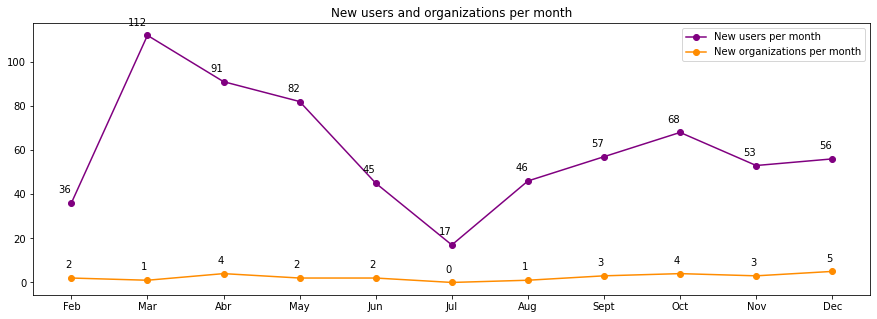

In [7]:
period =  ['Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
users = new_users_month['N of new user_id'].values
orgs = new_orgs_month['N of new organization_id'].values


plt.figure(figsize=(15,5))
plt.plot(period, users, color='purple', marker='o', label='New users per month')
plt.plot(period, orgs, color='darkorange', marker='o', label='New organizations per month')

for x,y in zip(period,users):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center
    
for x,y in zip(period,orgs):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                ha='right') # horizontal alignment can be left, right or center
    
plt.title('New users and organizations per month')
plt.legend()
plt.savefig('figures/3/1_new_month', bbox_inches='tight')
plt.show()

The following analysis has the purpose of understand the behaviour of the users in their first month and from that point on. Then I will remove all events corresponding to January 2020, because I don't know if they are new customers or old ones, so I will exclude them from the analysis

In [8]:
# first find the users that where already using the product on January 2020
jan_users = data[data['month']==1]['user_id'].unique()
len(jan_users)

80

In [9]:
# create a data set with all the users but the ones that where using the product on january
new_users = data[~data['user_id'].isin(jan_users)]
new_users.to_csv('new_users.csv', index=False)
new_users.head()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week
1721,ajs-d8a1a3ca623bdf9cfbb198a965bb68a7,2020-02-01 10:19:54,Welcome,3d9527c9-9496-46fa-b194-7d9d95f172d9,b8955d09-b93e-4f0a-8721-22a50856da74,2,5,32,Saturday
1722,ajs-3fcc8b53c358666c2d1b0b6ad2f8d52f,2020-02-01 10:36:38,Welcome,3d9527c9-9496-46fa-b194-7d9d95f172d9,b8955d09-b93e-4f0a-8721-22a50856da74,2,5,32,Saturday
1723,ajs-6a9e9bf0f9bbcd46e39e572e5580f6cb,2020-02-01 10:36:42,Welcome,3d9527c9-9496-46fa-b194-7d9d95f172d9,b8955d09-b93e-4f0a-8721-22a50856da74,2,5,32,Saturday
1727,ajs-d487a8712073b40f87da4cefd67063d9,2020-02-01 11:10:22,Welcome,3d9527c9-9496-46fa-b194-7d9d95f172d9,b8955d09-b93e-4f0a-8721-22a50856da74,2,5,32,Saturday
1764,ajs-edac33ad1ab8f87c47e42b16d11665e0,2020-02-02 20:24:21,Welcome,3d9527c9-9496-46fa-b194-7d9d95f172d9,8492c02c-73db-4113-91f2-f180d3a95699,2,5,33,Sunday


In [10]:
new_users = pd.read_csv('new_users.csv')

In [11]:
# month of first interaction
# grouping
grouping = new_users.groupby('user_id')['month']
# select the minimum of the group and create a column 
new_users['first_month_user'] = grouping.transform('min')
new_users.tail()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week,first_month_user
33005,ajs-a620726cf37ba8e559fefd152a67728c,2020-12-31 07:58:27,Welcome,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4
33006,ajs-cc8d5ee9120fed819977d739abd9d665,2020-12-31 07:58:30,All job positions,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4
33007,ajs-716e5bb02864571367e5f79d8e1c1b17,2020-12-31 07:58:32,Job position,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4
33008,ajs-ca67602d7712269030b8698870c3a8e8,2020-12-31 10:10:19,Job position,54cffcb5-0d9a-4d89-a146-440a95bb0c81,e3bd6c0b-2719-4a8e-94fc-e634c6522977,12,53,366,Thursday,11
33009,ajs-d4201b9d666b52797e000c12523116ee,2020-12-31 12:13:04,Job position,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4


In [12]:
# user month is the month when a user did an interaction, considering his or her customer life
new_users['user_month'] = new_users['month'] - new_users['first_month_user'] +1
new_users.tail()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week,first_month_user,user_month
33005,ajs-a620726cf37ba8e559fefd152a67728c,2020-12-31 07:58:27,Welcome,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4,9
33006,ajs-cc8d5ee9120fed819977d739abd9d665,2020-12-31 07:58:30,All job positions,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4,9
33007,ajs-716e5bb02864571367e5f79d8e1c1b17,2020-12-31 07:58:32,Job position,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4,9
33008,ajs-ca67602d7712269030b8698870c3a8e8,2020-12-31 10:10:19,Job position,54cffcb5-0d9a-4d89-a146-440a95bb0c81,e3bd6c0b-2719-4a8e-94fc-e634c6522977,12,53,366,Thursday,11,2
33009,ajs-d4201b9d666b52797e000c12523116ee,2020-12-31 12:13:04,Job position,d95b2ea4-af3c-4dfe-9ba2-315c120815b4,3b075d85-8872-4a74-bb52-dba13fcf062d,12,53,366,Thursday,4,9


In [13]:
# N of users per user_month
users_lifemonth = new_users.groupby('user_month')['user_id'].nunique().reset_index()
users_lifemonth = users_lifemonth.rename(columns={'user_id': 'N users'})
users_lifemonth = users_lifemonth.transpose()
# save image of table for presentation
dfi.export(users_lifemonth .head(), 'tables/table2.png')
users_lifemonth.head()

,0,1,2,3,4,5,6,7,8,9,10
user_month,1,2,3,4,5,6,7,8,9,10,11
N users,663,212,119,71,65,48,66,46,32,12,4


In [14]:
# average number of interactions, per user, in their 1st, 2nd, 3rd.. month
events_user = new_users.groupby(['user_id', 'user_month', 'page_title'])['event_id'].count().reset_index()
events_user = events_user.rename(columns={'event_id': 'N events'})
events_user = events_user.pivot(index=['user_id', 'user_month'], columns='page_title', values='N events').reset_index()
events_user = events_user.fillna(0)
events_user.columns.name = ''
events_user['All'] = events_user['All job positions'] + events_user['Candidate page'] + events_user['Job position'] + events_user['Welcome']
events_user.head()

,user_id,user_month,All job positions,Candidate page,Job position,Welcome,All
0,00065227-3eb4-41b0-bf53-bf87663f0f94,1,0.0,0.0,0.0,5.0,5.0
1,00065227-3eb4-41b0-bf53-bf87663f0f94,2,0.0,0.0,0.0,1.0,1.0
2,000c5ff6-d9e4-4b37-9abc-2861a7e803f9,1,4.0,0.0,0.0,8.0,12.0
3,011d3aa9-8e93-438d-b861-3b2409506a15,1,0.0,0.0,0.0,2.0,2.0
4,01c1c604-ae1c-4177-8c5f-d9d6ab90dde2,1,0.0,0.0,0.0,4.0,4.0


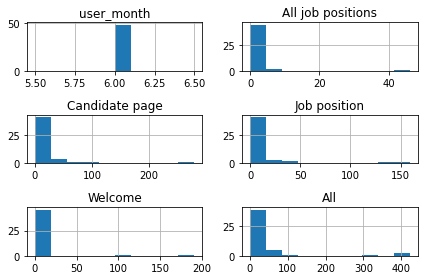

In [15]:
events_user[events_user['user_month'] == 6].hist()
plt.tight_layout()

In [16]:
metric = 'max'
agg_dict = {'All job positions': metric , 'Candidate page': metric, 
            'Job position': metric, 'Welcome': metric, 'All': metric}
events_user.groupby('user_month').agg(agg_dict).reset_index()

,user_month,All job positions,Candidate page,Job position,Welcome,All
0,1,72.0,256.0,322.0,188.0,714.0
1,2,44.0,130.0,188.0,102.0,374.0
2,3,27.0,204.0,139.0,168.0,395.0
3,4,19.0,147.0,197.0,245.0,588.0
4,5,53.0,210.0,160.0,213.0,504.0
5,6,46.0,279.0,159.0,191.0,422.0
6,7,32.0,190.0,58.0,69.0,243.0
7,8,27.0,172.0,65.0,20.0,208.0
8,9,14.0,164.0,164.0,16.0,349.0
9,10,19.0,74.0,23.0,9.0,99.0


In [17]:
metric = 'mean'
agg_dict = {'All job positions': metric , 'Candidate page': metric, 
            'Job position': metric, 'Welcome': metric, 'All': metric}
mean = events_user.groupby('user_month').agg(agg_dict).reset_index()
mean

,user_month,All job positions,Candidate page,Job position,Welcome,All
0,1,1.010558,4.561086,4.974359,5.797888,16.343891
1,2,1.872642,9.622642,9.273585,7.320755,28.089623
2,3,1.899160,14.386555,11.100840,6.974790,34.361345
3,4,1.605634,17.366197,10.788732,7.845070,37.605634
4,5,2.630769,16.923077,11.461538,8.138462,39.153846
5,6,1.895833,18.562500,11.979167,10.416667,42.854167
6,7,2.560606,13.772727,7.909091,5.772727,30.015152
7,8,1.608696,15.847826,5.956522,3.695652,27.108696
8,9,1.875000,20.156250,11.968750,3.343750,37.343750
9,10,4.250000,14.166667,8.500000,2.750000,29.666667


In [18]:
metric = 'min'
agg_dict = {'All job positions': metric , 'Candidate page': metric, 
            'Job position': metric, 'Welcome': metric, 'All': metric}
events_user.groupby('user_month').agg(agg_dict).reset_index()

,user_month,All job positions,Candidate page,Job position,Welcome,All
0,1,0.0,0.0,0.0,0.0,1.0
1,2,0.0,0.0,0.0,0.0,1.0
2,3,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,0.0,1.0
4,5,0.0,0.0,0.0,0.0,1.0
5,6,0.0,0.0,0.0,0.0,1.0
6,7,0.0,0.0,0.0,0.0,1.0
7,8,0.0,0.0,0.0,0.0,1.0
8,9,0.0,0.0,0.0,0.0,1.0
9,10,0.0,0.0,0.0,0.0,3.0


In [19]:
mean = mean.set_index('user_month')
mean.head()

,All job positions,Candidate page,Job position,Welcome,All
user_month,,,,,
1,1.010558,4.561086,4.974359,5.797888,16.343891
2,1.872642,9.622642,9.273585,7.320755,28.089623
3,1.899160,14.386555,11.100840,6.974790,34.361345
4,1.605634,17.366197,10.788732,7.845070,37.605634
5,2.630769,16.923077,11.461538,8.138462,39.153846


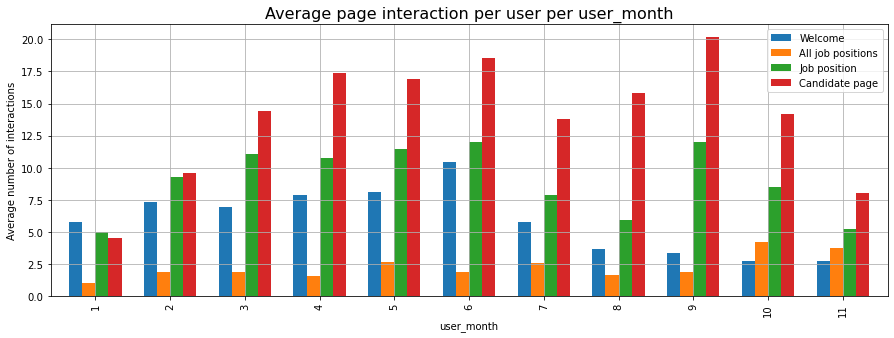

In [21]:
pages = ['Welcome', 'All job positions', 'Job position', 'Candidate page']

mean[pages].plot(kind='bar', width = 0.7, figsize=(15,5))

plt.grid(True)
plt.title('Average page interaction per user per user_month', fontsize = 16)
plt.ylabel('Average number of interactions')
plt.xlabel('user_month')

plt.savefig('figures/3/2_mean', bbox_inches='tight')
plt.show()

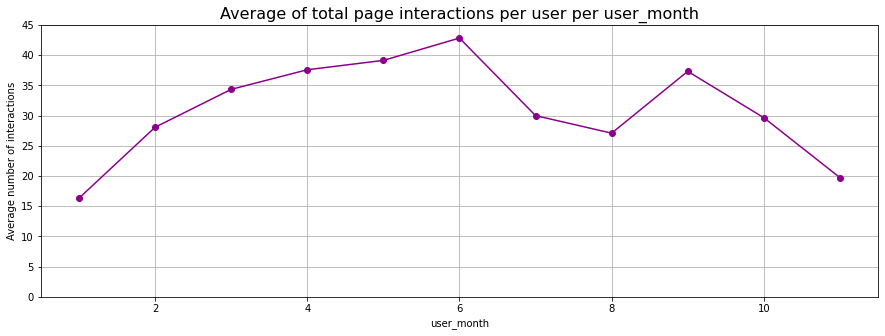

In [23]:
mean['All'].plot(color = 'darkmagenta', marker= 'o', figsize = (15,5))
plt.ylim(0, 45)
plt.grid(True)
plt.title('Average of total page interactions per user per user_month', fontsize = 16)
plt.ylabel('Average number of interactions')
plt.xlabel('user_month')
plt.savefig('figures/3/3_mean_all', bbox_inches='tight')

plt.show()